# Data Exploration

In deze notebook gaan we werken met een dataset de eigenschappen van een hele reeks huizen uit Amerika bevat samen met hun verkoopprijs. 
Deze dataset kan gebruikt worden om de verkoopprijs van een huis in te schatten maar in deze notebook gaan we vooral focussen op het verkennen en bestuderen van de dataset.
De link naar deze dataset is: https://www.kaggle.com/c/house-prices-advanced-regression-techniques.
Via deze link kan je heel wat informatie vinden over welke gegevens er in deze dataset zitten.
Voor we beginnen met deze dataset te verkennen moeten we een aantal libraries inladen. 
Doe dit hieronder:

In [1]:
# import everything
import opendatasets as od
from zipfile import ZipFile
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt # de basis, low level en kan je veel mee doen
# plotten met pandas is ook mogelijk
import seaborn as sns # een andere library voor iets geavanceerdere zaken (gebaseerd op matplotlib)

## Downloaden en inladen dataset

De eerste stap is om de dataset in te downloaden.
Aangezien we hier werken met een dataset van kaggle gaat het iets complexer zijn dan de voorgaande.
Volg [deze stappen](https://www.analyticsvidhya.com/blog/2021/04/how-to-download-kaggle-datasets-using-jupyter-notebook/) om de dataset correct te downloaden.
* Maak een account aan op Kaggle
* Maak een API - token aan (Rechtsbovenaan op het icoontje -> Account -> API -> Create New API Token
* Download dit token in de vorm van de json. Hierin staat je username en key die je meegeeft bij het downloaden

Merk op dat dit een zip gedownload heeft omdat de datset bestaat uit 4 bestanden. 
Unzip nu de dataset.
Laad daarna de train.csv file in als panda.
De informatie over de categorieke data zit in de txt-file.
De andere files moeten gebruikt worden voor de sale-price te voorspellen om te bepalen hoe goe je model werkt en zo op het leaderboard terecht te komen.
Hoeveel rijen en kolommen heeft de gecombineerde dataset? Is dit correct gedaan?

In [2]:
#download
od.download("https://www.kaggle.com/c/house-prices-advanced-regression-techniques")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jensbaetensodisee
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████| 199k/199k [00:00<00:00, 2.19MB/s]

In [5]:
zf = ZipFile(".\\house-prices-advanced-regression-techniques\\house-prices-advanced-regression-techniques.zip")
directory = ".\\house-prices-advanced-regression-techniques"
zf.extractall(directory)

In [6]:
df_train = pd.read_csv(directory + "\\train.csv")
df_test = pd.read_csv(directory + "\\test.csv")

In [7]:
display(df_train.head())
display(df_train.info())
display(df_test.head())
display(df_test.info())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

None

## Bestuderen dataset

### Globale informatie over de kolommen

En eerste stap om informatie over de beschikbare data te bkomen is door middel van de functie [info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html).
Deze functie geeft een overzicht van hoeveel rijen en kolommen er in het dataframe zijn, wat voor type data de verschillende kolommen bevatten en hoeveel null-waarden er in elke kolom zitten.
Daarnaast kunnen we met [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) meer informatie opvragen over de verdeling van de numerieke waarden per kolom.

In [8]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


De dataset kan in twee gesplits worden op basis van hun soort data dat ze bevatten, bijvoorbeeld Categorieke of Numerieke data.
Dit kan je doen door een gekozen dtype te selecteren of eruit te halen door middel van de functie [select_dtypes()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html?highlight=select_dtypes#pandas.DataFrame.select_dtypes). 
Een tekstuele waarde wordt in een dataframe steeds als een object dtype.
Hoeveel kolommen zijn er van elk?
Splits daarna het dataframe met de numerieke data ook nog eens in discrete of continue waarden.

In [11]:
# categorieke data heeft het dtype object dus filter deze eruit
categorieke_data = df_train.select_dtypes(include="object")
numerieke_data = df_train.select_dtypes(exclude="object")
discrete_data = numerieke_data.select_dtypes(include="int64")
continue_data = numerieke_data.select_dtypes(include="float64")

### Unieke waarden

Naast het bekijken van wat voor type data we beschikbaar hebben, kan er ook gekeken worden naar hoeveel unieke waarden elke categorie bevat. 
Dit kan door voor elke categorieke kolom, een bar plot te laten tekenen met behulp van de functie [plot.bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html). 
Deze methode maakt gebruik van de standaard plotting tools van pandas, welke een wrapper zijn voor de functionaliteiten van de library [matplotlib](https://matplotlib.org/).
Voor het maken van ingewikkelde plots kan het zijn dat je ook zaken rechtstreeks uit die library nodig hebt.
Daarnaast bestaat er ook nog de library [seaborn](https://seaborn.pydata.org/index.html) die gebouwd is boven op matplotlib en goed geintegreerd is met pandas. 

Na het plotten van de unieke waarden van alle kolommen, kies een kolom met categorieke data uit en maak een barplot waar elke bar weergeeft hoe frequent deze waarde voorkomt, gebruik hiervoor de functie [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html). 
Probeer er ook een pie chart van te maken met behulp van deze links voor [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html) of [seaborn]()


<AxesSubplot:>

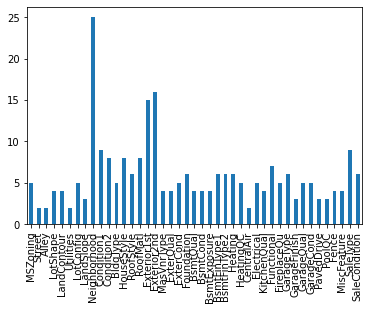

In [13]:
categorieke_data.nunique().plot.bar()

<AxesSubplot:>

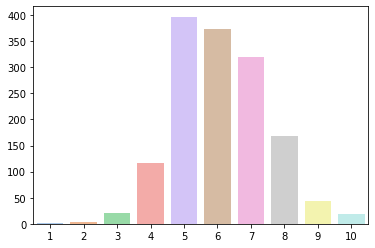

In [19]:
#numerieke_data.OverallQual.value_counts().sort_index().plot.bar()
# met seaborn
tmp = numerieke_data.OverallQual.value_counts().sort_index()
sns.barplot(x=tmp.index, y=tmp.values, palette="pastel")

Oefening: Maak door gebruik te maken van explode en labels en startangle argumenten de volgende figuur waarin de verdeling van de "OverallQual" kolom getoond wordt, zo goed als mogelijk na met behulp van matplotlib. 
Merk op dat deze kolom numerieke waarden (0 tot en met 10) bevat en dus niet in de categorieke data zit. De labels kunnen echter omgezet worden op basis van de waarden uit het txt-bestand. Meer informatie over het op te bouwen van een pie chart vind je [hier](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) en de standaard kleurcombinaties vind je [hier](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

![Example](example1.png)

([<matplotlib.patches.Wedge at 0x2210ff20eb0>,
 [Text(0.21092241035006856, 1.0795886887199762, 'Average'),
  Text(-1.0939740892112308, 0.114981268624321, 'Above Average'),
  Text(-0.20162262674213666, -1.0813640998228122, 'Good'),
  Text(0.912207602928934, -0.7796648569472966, 'Very Good'),
  Text(1.1944616797213228, -0.11515769916647554, 'Below Average'),
  Text(1.1638673860171966, 0.29225452565443305, 'Excellent'),
  Text(1.206499890188803, 0.4841053758990976, 'Fair'),
  Text(1.252384940662751, 0.6257251476496354, 'Very Excellent'),
  Text(1.3975329575326163, 0.779038915979259, 'Poor'),
  Text(1.5627044812851782, 0.8932831041563598, 'Very Poor')],
 [Text(0.11504858746367375, 0.5888665574836233, '27.2%'),
  Text(-0.5967131395697621, 0.06271705561326599, '25.6%'),
  Text(-0.10997597822298362, -0.5898349635397158, '21.8%'),
  Text(0.5321211017085448, -0.454804499885923, '11.5%'),
  Text(0.6967693131707715, -0.06717532451377739, '7.9%'),
  Text(0.6789226418433647, 0.17048180663175258, '2

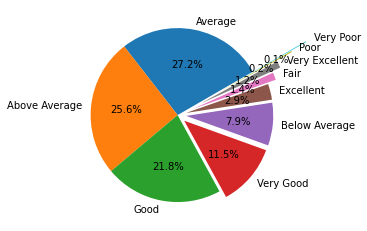

In [31]:
tmp = numerieke_data.OverallQual.value_counts()
lbls=["Average", "Above Average", "Good", "Very Good", "Below Average", "Excellent", "Fair", "Very Excellent", "Poor", "Very Poor"]
explode=[0, 0, 0, 0.1, 0.1, 0.1, 0.2, 0.3,0.5,0.7]

# labels zet de labels aan de buitenkant
# startangle draait de pie-plot met zoveel graden
# auto pct zet het percentage in de figuur (de 1 achter het punt geeft het aantal cijfers na de komma weer)
# de explode schuift de stukken van de pie plot naar buiten
plt.pie(tmp, labels=lbls, startangle=30, autopct="%1.1f%%", explode=explode)

### Statistische waarden

We hebben reeds gezien dat een heel aantal statische waarden berekend worden voor numerieke kolommen door de functie describe(), namelijk het gemiddelde en mediaan (de 50%) wordt berekend, de standaardafwijking en de variante (kwadraat van de std), minimum en maximum. Er zijn echter nog twee zaken die ontbreken, namelijk de lowerThresholdOutlier en UpperThresholdOutlier (welke berekend kunnen worden door respectievelijk het eerste of laatste kwartiel te verlagen of verhogen met 1,5 keer de interkwartielafstand). Doe dit nu en combineer het met het resultaat in een dataframe.

In [40]:
stats = numerieke_data.describe()
stats.loc["IQR"] = stats.loc["75%"] - stats.loc["25%"]
stats.loc["LowerTreshold"] = stats.loc["25%"] - 1.5 * stats.loc["IQR"]
stats.loc["UpperThreshold"] = stats.loc["75%"] + 1.5 * stats.loc["IQR"]
stats

def remove_outliers(row):
    outlier_low = row < stats.loc["LowerTreshold"]
    outlier_high = row > stats.loc["UpperThreshold"]
    
    if sum(outlier_high) > 0 or sum(outlier_low) > 0:
        return True
    return False
    
fltr = numerieke_data.apply(remove_outliers, axis=1)
numerieke_data[fltr]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,0,28,0,0,0,0,0,5,2006,145000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


Maak nu op basis van dit dataframe een bar plot dat het gemiddelde, standaardafwijking, de drie kwartielen en de upper/lower threshold toont voor de kolommen LotArea en TotalBsmtSF.

Om de verdeling van een kolom met numerieke waarde te bekijken, kan er ook een histogram gemaakt worden.
Doe dit nu voor de kolommen LotArea en YearBuilt

In [45]:
numerieke_data.LotArea.plot.hist(bins=100000)

<AxesSubplot:ylabel='Frequency'>

Error in callback <function flush_figures at 0x0000022108094820> (for post_execute):


KeyboardInterrupt: 

### Verband tussen twee variabelen

Door de statistische waarden en distributies van verschillende kolommen te vergelijken is het moeilijk om te bepalen welke kolommen belangrijk zijn om je vraag op te lossen. 
Ook is het moeilijk om het verband tussen verschillende features te bepalen. 
In het volgende deel wordt er gefocused om dit verband te bestuderen en te bepalen. 

#### ScatterPlots

Een eerste manier is dit verband te bestuderen is door middel van scatter plots.
Dit geeft het verband tussen twee features. 
Doe dit nu voor de features GrLivArea en SalePrice en voor de features TotalBsmtSF en SalePrice.
Indien je een derde feature wil erbij betrekken kan dit doen door de markers een andere kleur/symbool/grootte te geven op basis van een derde feature. 
In sommige gevallen kan dit bruikbare data geven maar dit gaat niet altijd het geval zijn.

Oefening: We hebben reeds gezien dat de er een aantal heel grote gronden zijn verkocht. Maak nu een scatterplot van de LotArea, beperkt tot gronden kleiner dan 15000

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

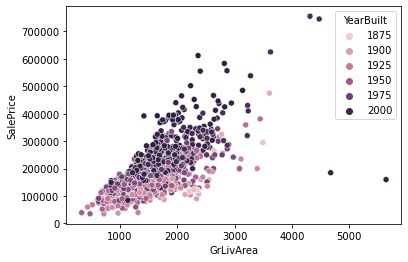

In [48]:
#numerieke_data.plot.scatter(x="GrLivArea", y="SalePrice")
sns.scatterplot(x=numerieke_data.GrLivArea, y=numerieke_data.SalePrice, hue=numerieke_data.YearBuilt)

#### Correlation matrix

Een correlatie matrix bevat de correlatie tussen alle mogelijke combinaties van twee willekeurige kolommen met numerieke waarden.
Deze kan berekend worden doormiddel van de [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) functie en getoond worden met behulp van [matshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html).
Dit geeft het volgende resultaat:

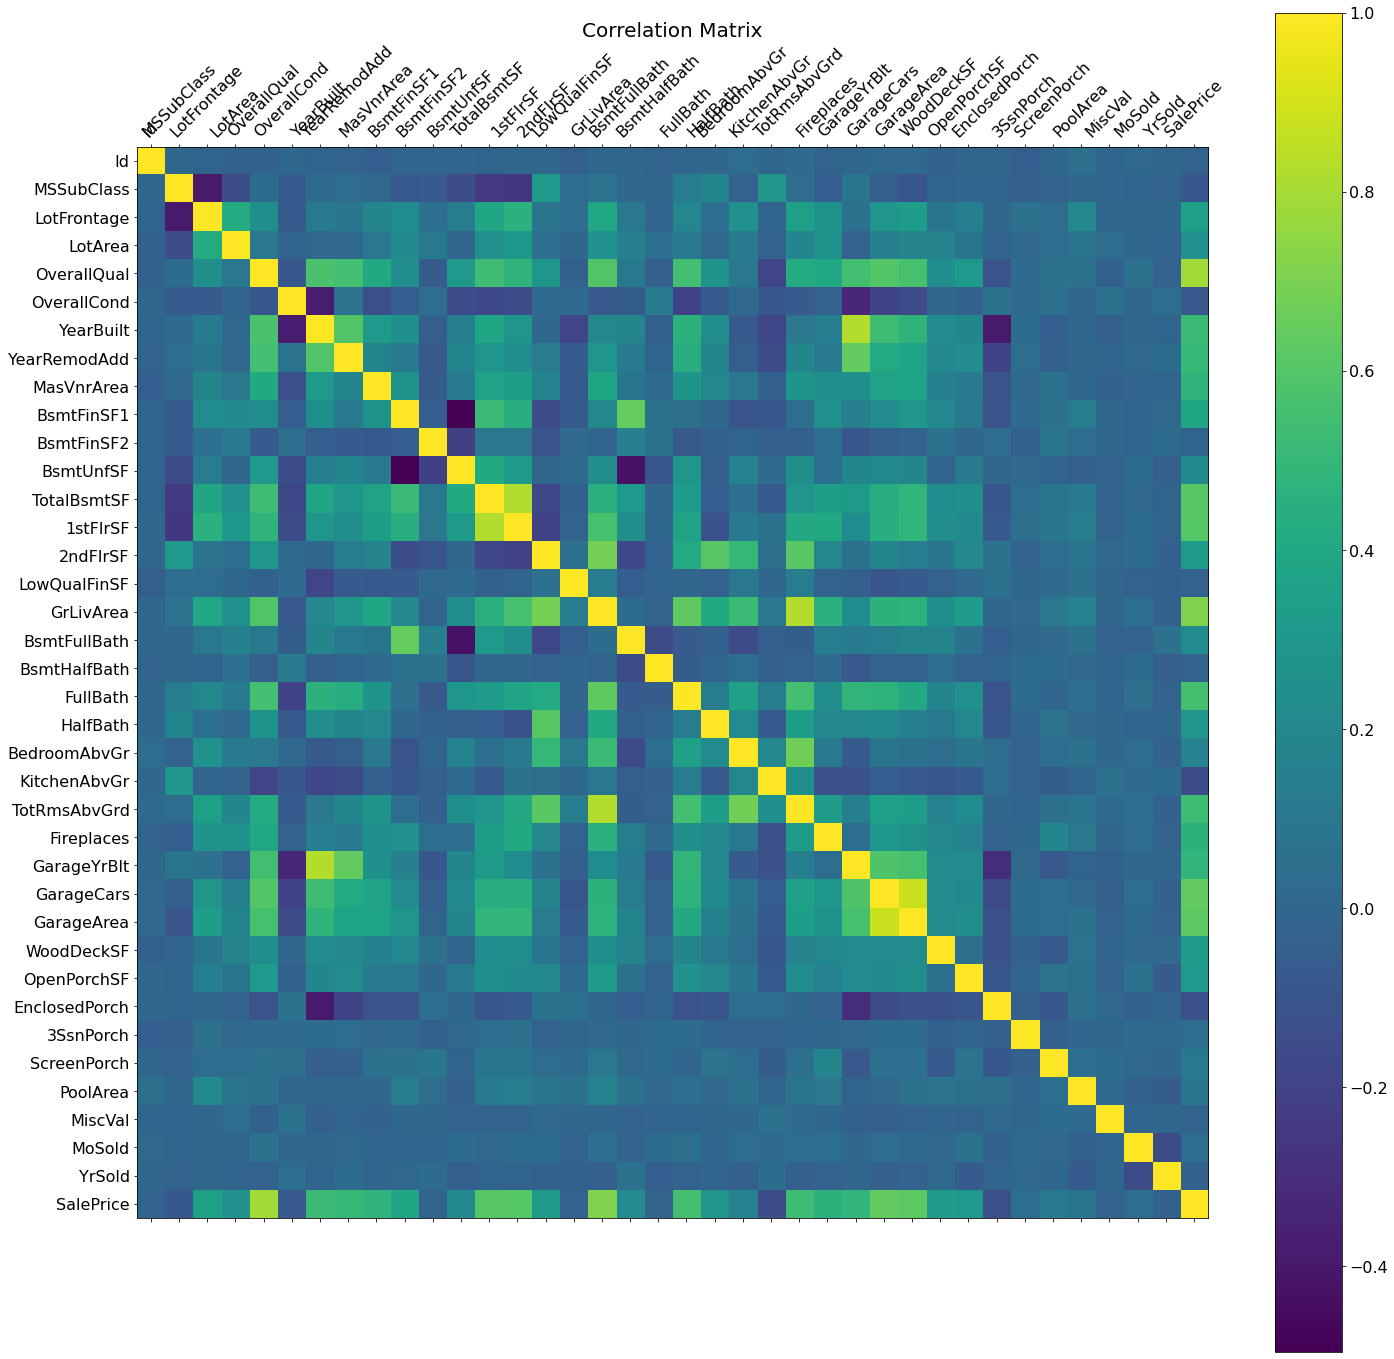

In [62]:
#plt.matshow(numerieke_data.corr())

f = plt.figure(figsize=(24,24))
plt.matshow(numerieke_data.corr(), fignum=f.number)
idx_columns = range(len(numerieke_data.columns))
plt.xticks(idx_columns, numerieke_data.columns, fontsize=16, rotation=45)
plt.yticks(idx_columns, numerieke_data.columns, fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.title("Correlation Matrix", fontsize=20)
plt.savefig("test.png")

Merk op dat de correlatie op de diagonaal altijd 1 is (dit komt door de definitie van correlatie).
Als we daarnaast eens kijken naar de correlatie van de SalePrice - dan zien we dat die sterk gecontroleerd is door de Overall Quality van het huis, de grootte van het huis en de grootte van de garage. 

Oefening: Maak een bar-plot die de gemiddelde SalePrice weergeeft van elke categorie van OverallQuall. Zorg ervoor dat de labels gecorrigeerd zijn (niet de numerieke waarden maar de categorie)

[Text(0, 0, 'Poor'),
 Text(1, 0, 'Very Poor'),
 Text(2, 0, 'Fair'),
 Text(3, 0, 'Below Average'),
 Text(4, 0, 'Average'),
 Text(5, 0, 'Above Average'),
 Text(6, 0, 'Good'),
 Text(7, 0, 'Very Good'),
 Text(8, 0, 'Excellent'),
 Text(9, 0, 'Very Excellent')]

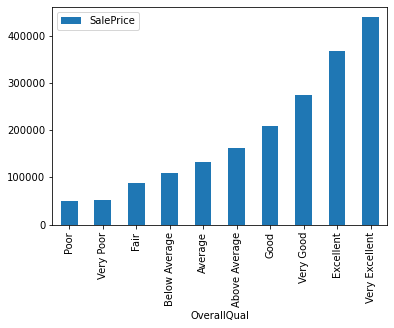

In [66]:
tmp = numerieke_data[["OverallQual", "SalePrice"]]
means = tmp.groupby("OverallQual").mean()
ax = means.plot.bar()
lbls=[ "Poor", "Very Poor",  "Fair","Below Average", "Average", "Above Average", "Good", "Very Good",  "Excellent", "Very Excellent"]
ax.set_xticklabels(lbls)

Als we nu de belangrijkste features willen detecteren voor het voorspellen van de SalePrice moeten we kijken naar de kolom of rij van de SalePrice in de correlation matrix. 
We kunnen de correlatie-waarden van de SalePrice kolom afzonderlijk tonen in een bar-plot.
Dit kan ook gedaan worden voor de categorieke data, maar dan moeten wel eerst alle labels omgezet worden naar getallen (numerieke waarden).
Hiervoor kan de [OrdinalEncoder]() van sklearn gebruikt worden.

C:\Users\jens.baetens3\Anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


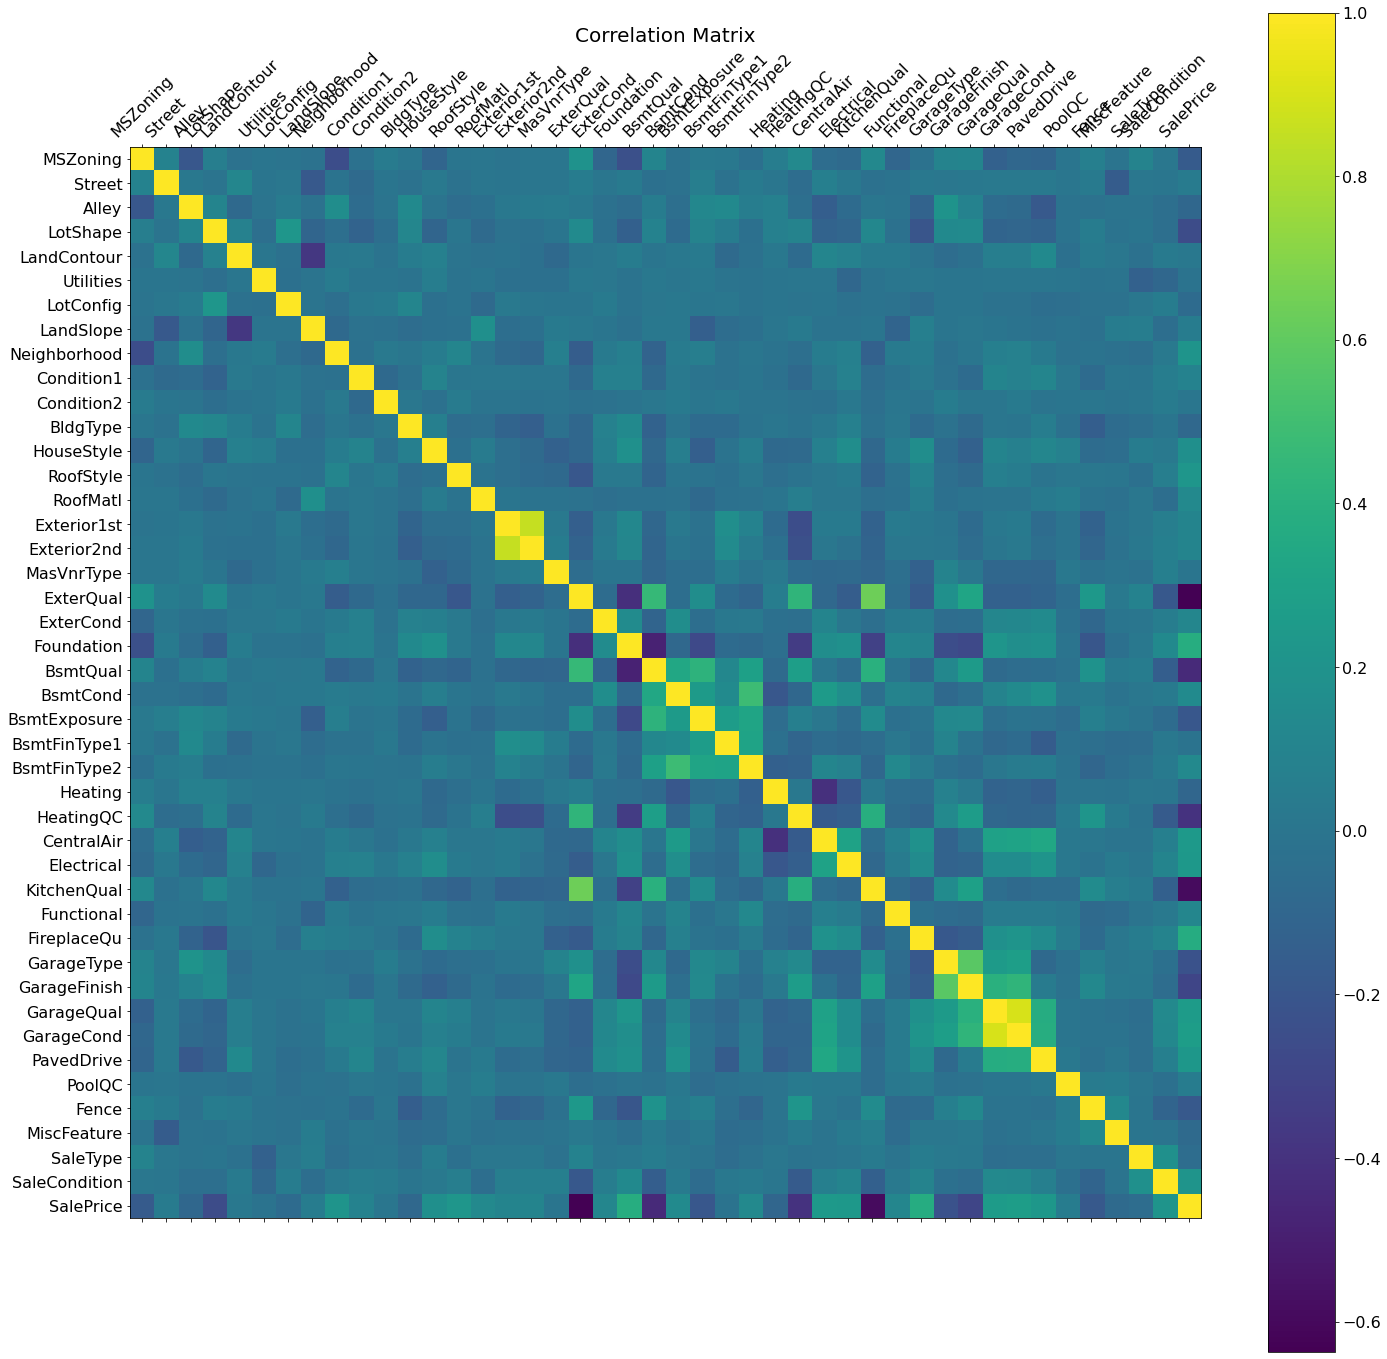

In [72]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

categorieke_data.fillna("", inplace=True)
encoded = encoder.fit_transform(categorieke_data)
df_encoded_categorieke = pd.DataFrame(encoded, columns=categorieke_data.columns)

df_encoded_categorieke["SalePrice"] = numerieke_data.SalePrice

f = plt.figure(figsize=(24,24))
plt.matshow(df_encoded_categorieke.corr(), fignum=f.number)
idx_columns = range(len(df_encoded_categorieke.columns))
plt.xticks(idx_columns, df_encoded_categorieke.columns, fontsize=16, rotation=45)
plt.yticks(idx_columns, df_encoded_categorieke.columns, fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.title("Correlation Matrix", fontsize=20)
plt.savefig("test.png")

Daarnaast kan een pairplot ook veel informatie opleveren. Een pairplot is net zoals een correlation matrix een figuur waar elke combinatie van twee parameters bekeken wordt. In plaats van de correlatie te bestuderen wordt er een scatter plot gemaakt. Dit kan weergeven welk verband er is tussen deze twee parameters. Hoe beter deze plots een curve maken, hoe beter de ze elkaar gaan voorspellen/ hoe hoger de correlatie. Meer informatie hierover vind je [hier](https://seaborn.pydata.org/generated/seaborn.pairplot.html). Aangezien de diagonale de combinatie tonen van slechts 1 parameter worden hierbij de histogrammen getekend van de verschillende parameters.

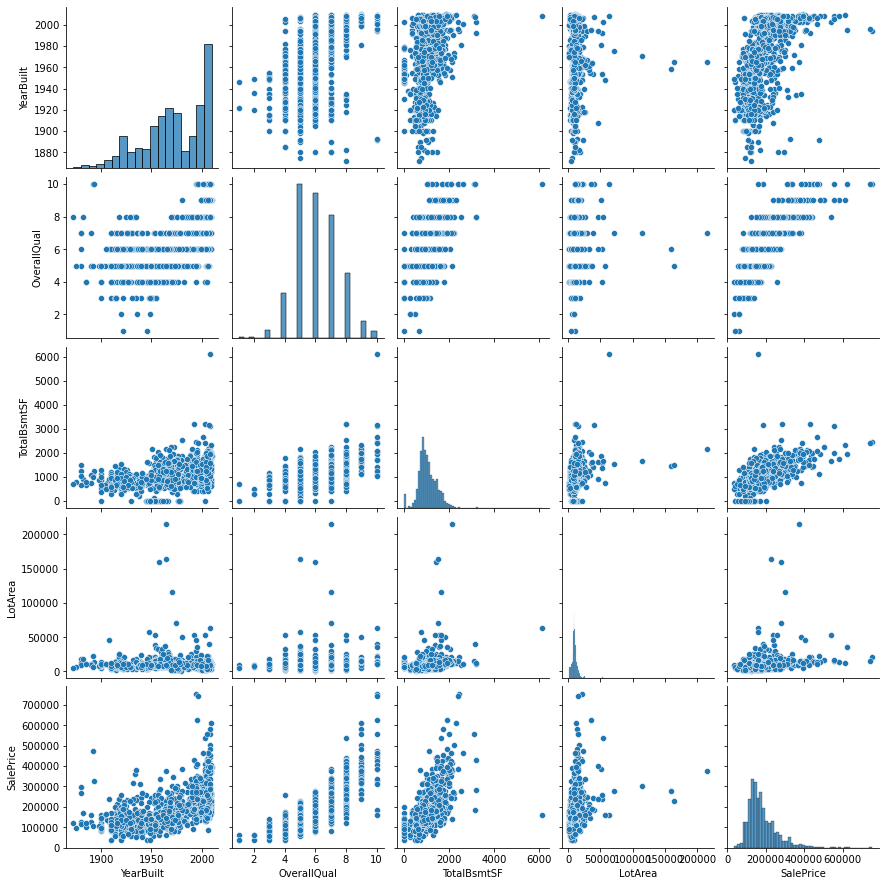

In [74]:
sns.pairplot(numerieke_data[["YearBuilt", "OverallQual", "TotalBsmtSF", "LotArea", "SalePrice"]])

### Outlier detection

We hebben reeds al aangehaald in het bovenstaande dat er redelijk wat outliers aanwezig zijn in deze dataset.
Daarvoor hebben we de upper en lower thresholds berekend voor de numerieke features.
Dit kan op de volgende manier:

In [ ]:
def remove_outliers(row):
    outlier_low = row < stats.loc["LowerTreshold"]
    outlier_high = row > stats.loc["UpperThreshold"]
    
    if sum(outlier_high) > 0 or sum(outlier_low) > 0:
        return True
    return False
    
fltr = numerieke_data.apply(remove_outliers, axis=1)
numerieke_data[fltr]

Oefening: Maak een boxplot van LotFrontage om de outliers in meer detail te zien.

Oefening: In plaats van kwartielen te gebruiken, bereken het aantal outliers door te kijken naar 20% en 80% van het maximum als lower en upper threshold.

<AxesSubplot:>

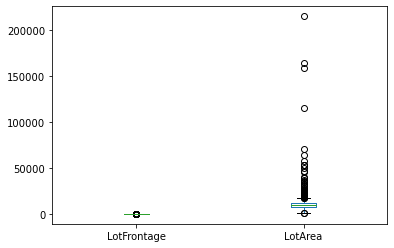

In [76]:
numerieke_data[["LotFrontage", "LotArea"]].plot.box()